## Problem Statement:

### An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

### 1 Read the dataset. Perform EDA , Exploratory Analysis and Inferences -> Univariate, Bivariate, and multivariate analysis using data visualization (Weekly, Monthly, Quarterly, Yearly Trends in Sales and Sales Across different Categories of different features in the given data) -> Summarise the inferences

In [45]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from os import system

from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
df=pd.read_excel('Sales_Data.xlsx',sheet_name='Sheet1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [47]:
df.shape

(2747, 20)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [50]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [51]:
#Checking duplicates in data
df_dup = df.duplicated()
print('Number of duplicate rows = %d' % (df_dup.sum()))

Number of duplicate rows = 0


### Univariate Analysis

In [52]:
#Finding unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n\n')

Field name is  STATUS : and Count for this categories are  6
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: STATUS, dtype: int64



Field name is  PRODUCTLINE : and Count for this categories are  7
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: PRODUCTLINE, dtype: int64



Field name is  PRODUCTCODE : and Count for this categories are  109
S24_3969    21
S18_4409    21
S18_2248    21
S18_1749    21
S18_4933    22
            ..
S32_2509    28
S50_1392    28
S24_1444    28
S24_2840    28
S18_3232    51
Name: PRODUCTCODE, Length: 109, dtype: int64



Field name is  CUSTOMERNAME : and Count for this categories are  89
Boards & Toys Co.                 3
Atelier graphique                 7
Royale Belge                      8
Auto-Moto Classics Inc.           8
Microscale Inc.                  

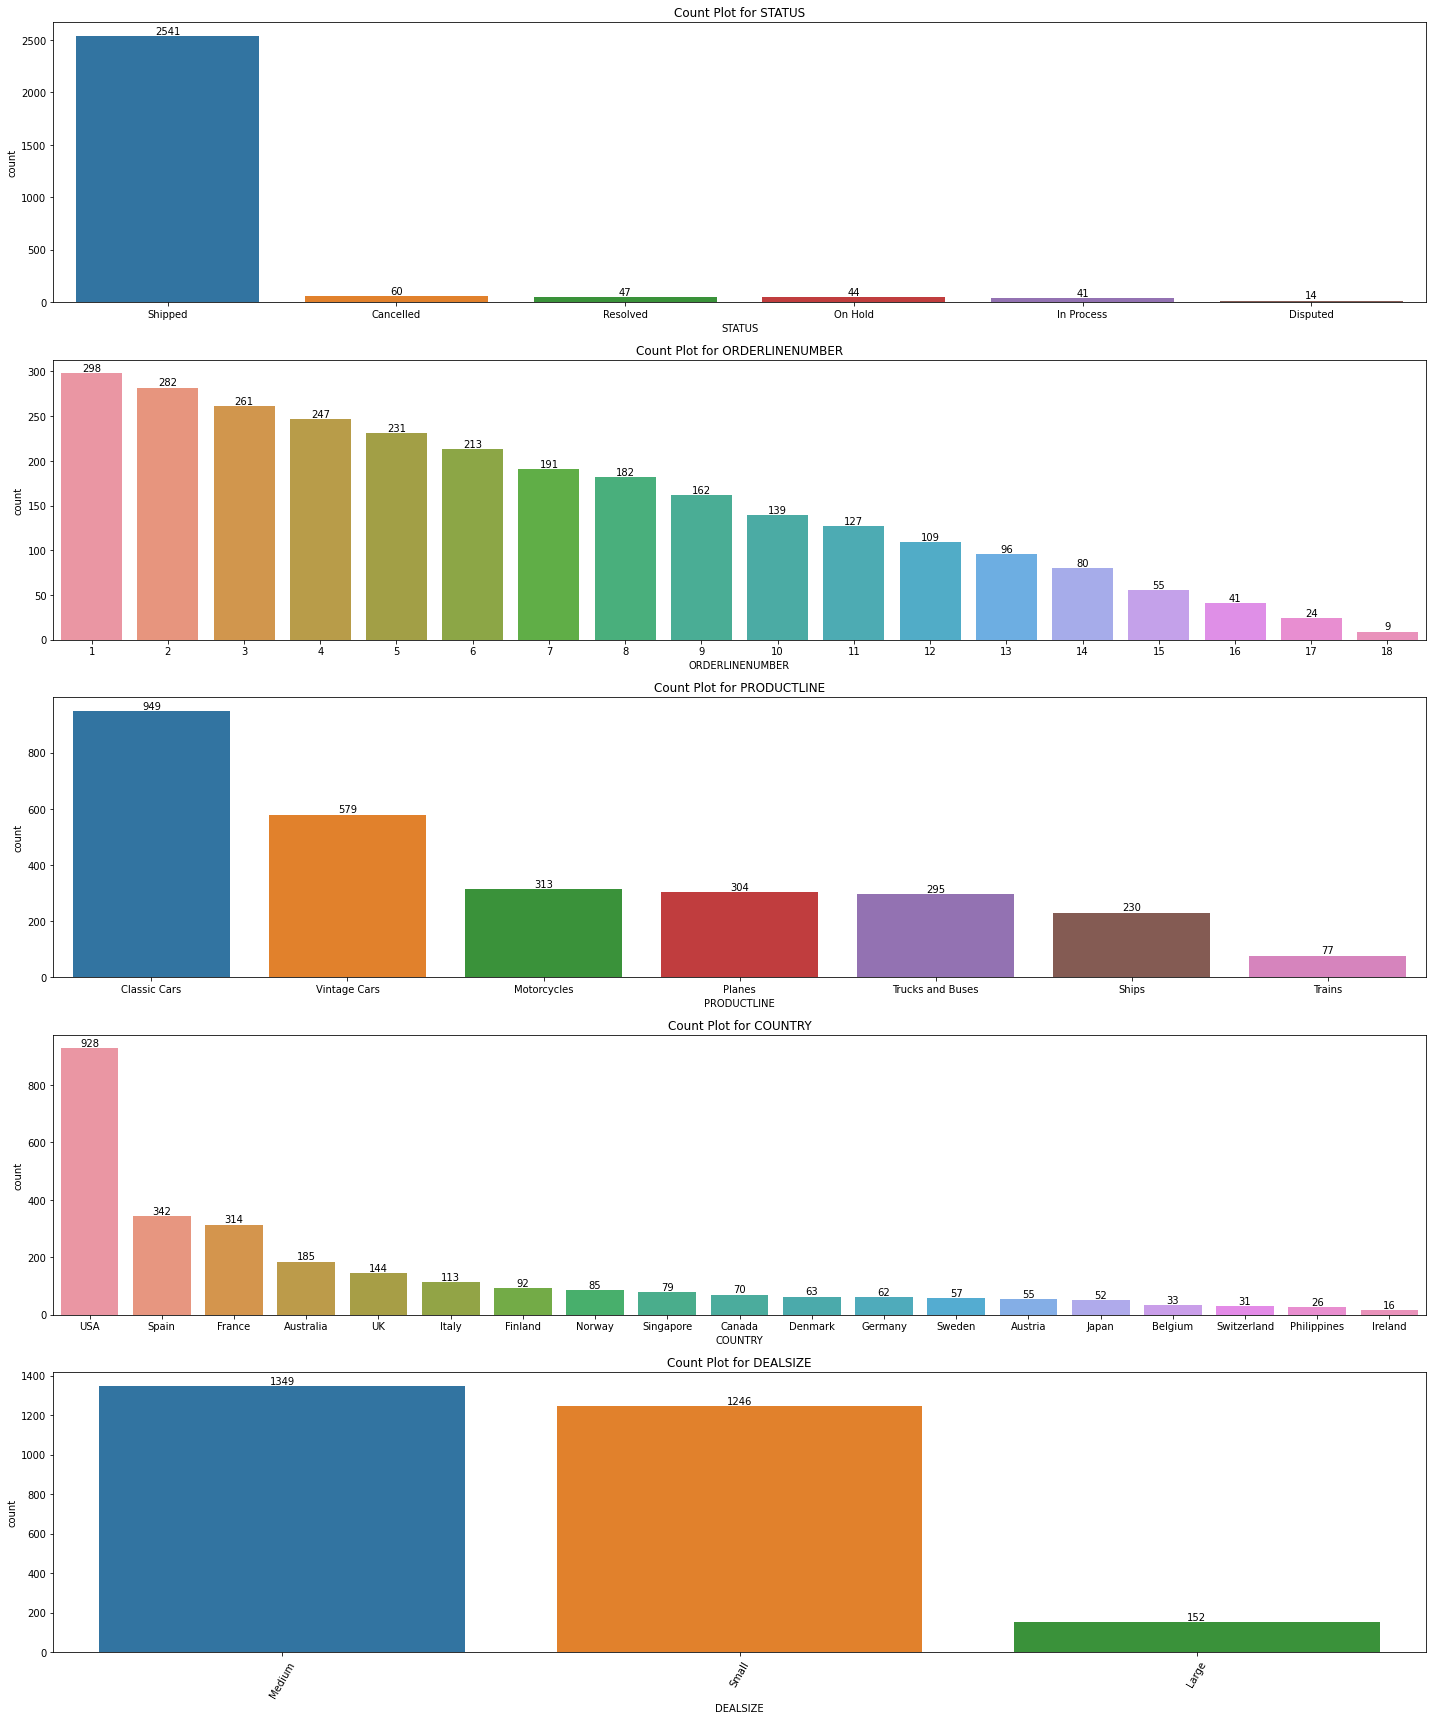

In [56]:
cols= ('STATUS','ORDERLINENUMBER','PRODUCTLINE','COUNTRY','DEALSIZE')

fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(20,24)
x=0
for i in cols:
    ax_count=sns.countplot(x=i, data=df,ax=axes[x], order = df[i].value_counts().index ) 
    ax_count.set(xlabel=i,title='Count Plot for '+i)
    x=x+1
    plt.xticks(rotation=60)
    plt.tight_layout()
    for container in ax_count.containers:
        ax_count.bar_label(container)

In [57]:
#df.skew()
df.skew().sort_values(ascending=False)
#calculating skewness before treating outliers present in the data.

SALES                   1.155940
PRICEEACH               0.697222
MSRP                    0.575646
ORDERLINENUMBER         0.575327
QUANTITYORDERED         0.369286
DAYS_SINCE_LASTORDER   -0.002983
ORDERNUMBER            -0.006995
dtype: float64

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


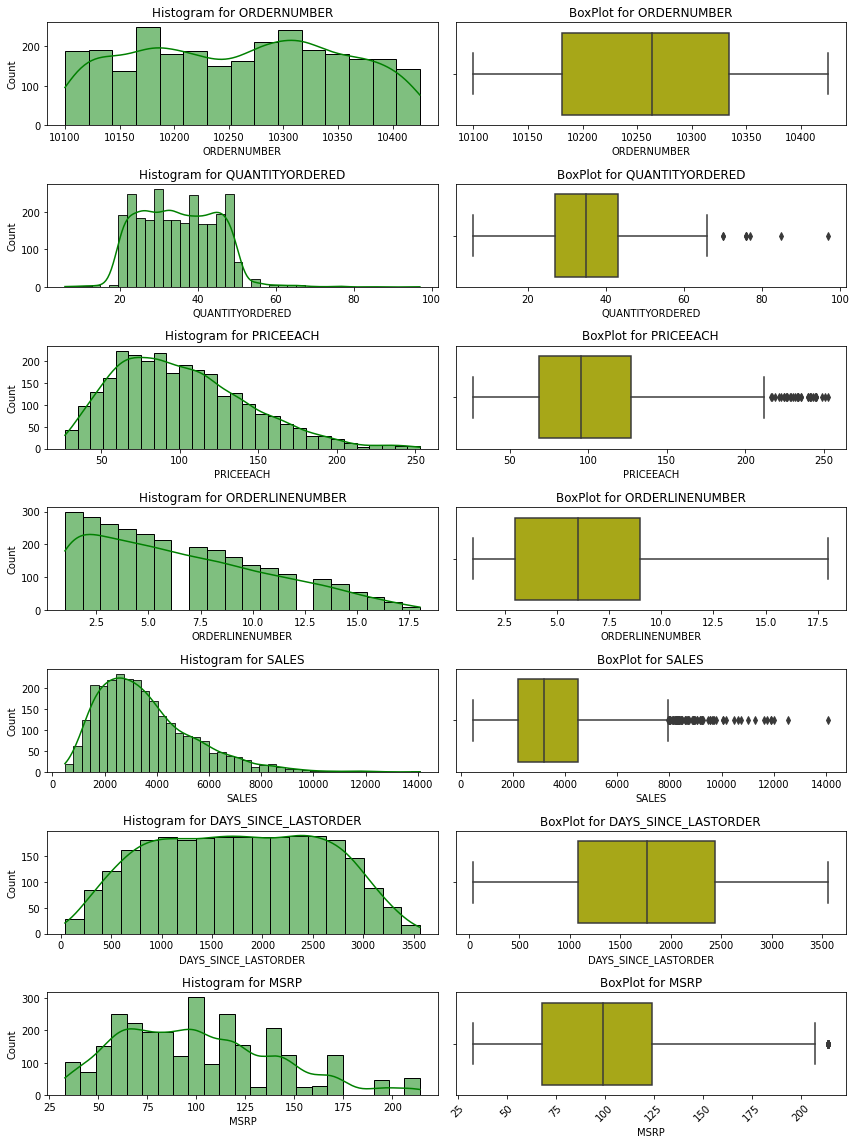

In [198]:
col_list=df.columns
print(col_list)

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,16)
x=0
y=0
for i in df.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df[i], data=df, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

### Bivariate Analysis

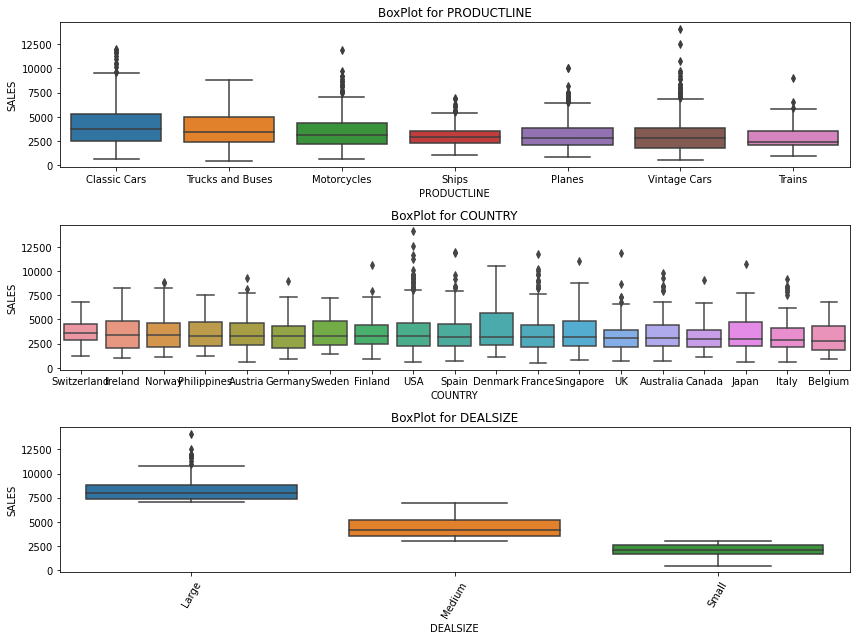

In [200]:
## sns.boxplot(x='economic.cond.household',y='vote', data=election_df)

cols = ('PRODUCTLINE','COUNTRY','DEALSIZE')

fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(12,9)
x=0
y=0
for i in cols:
        ax_box=sns.boxplot(x=i,y='SALES', data=df, ax=axes[x], order = df.groupby(i).median().sort_values(by="SALES", ascending=False).index )
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.xticks(rotation=60)
        plt.tight_layout()
        x=x+1

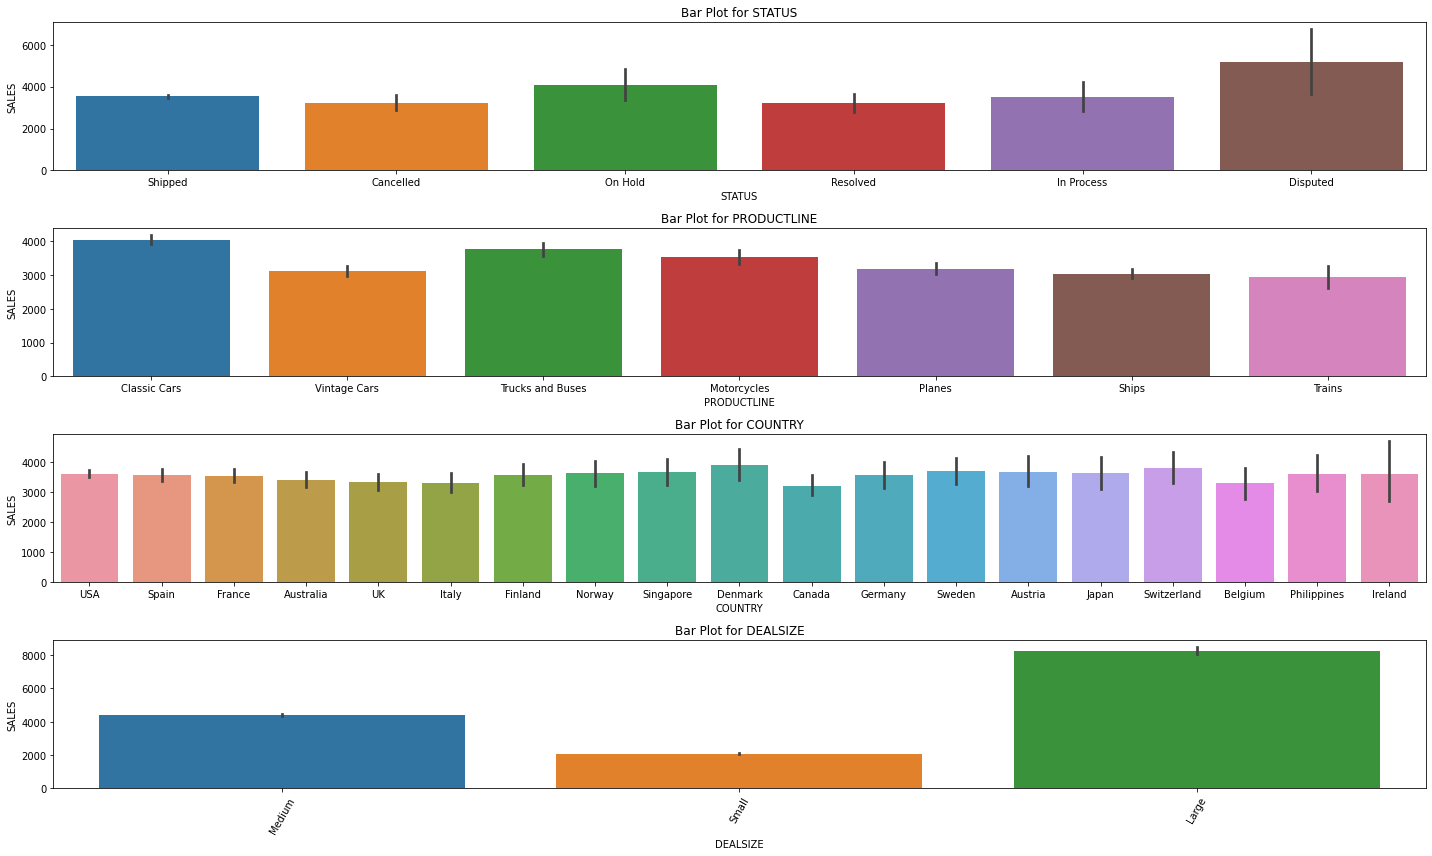

In [193]:
## sns.boxplot(x='economic.cond.household',y='vote', data=election_df)

cols = ('STATUS','PRODUCTLINE','COUNTRY','DEALSIZE')

fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(20,12)
x=0
y=0
for i in cols:
        ax_box=sns.barplot(x=i,y='SALES', data=df, ax=axes[x], order = df.groupby(i).sum().sort_values(by="SALES", ascending=False).index )
        ax_box.set(xlabel=i,title='Bar Plot for '+i)
        plt.xticks(rotation=60)
        plt.tight_layout()
        x=x+1

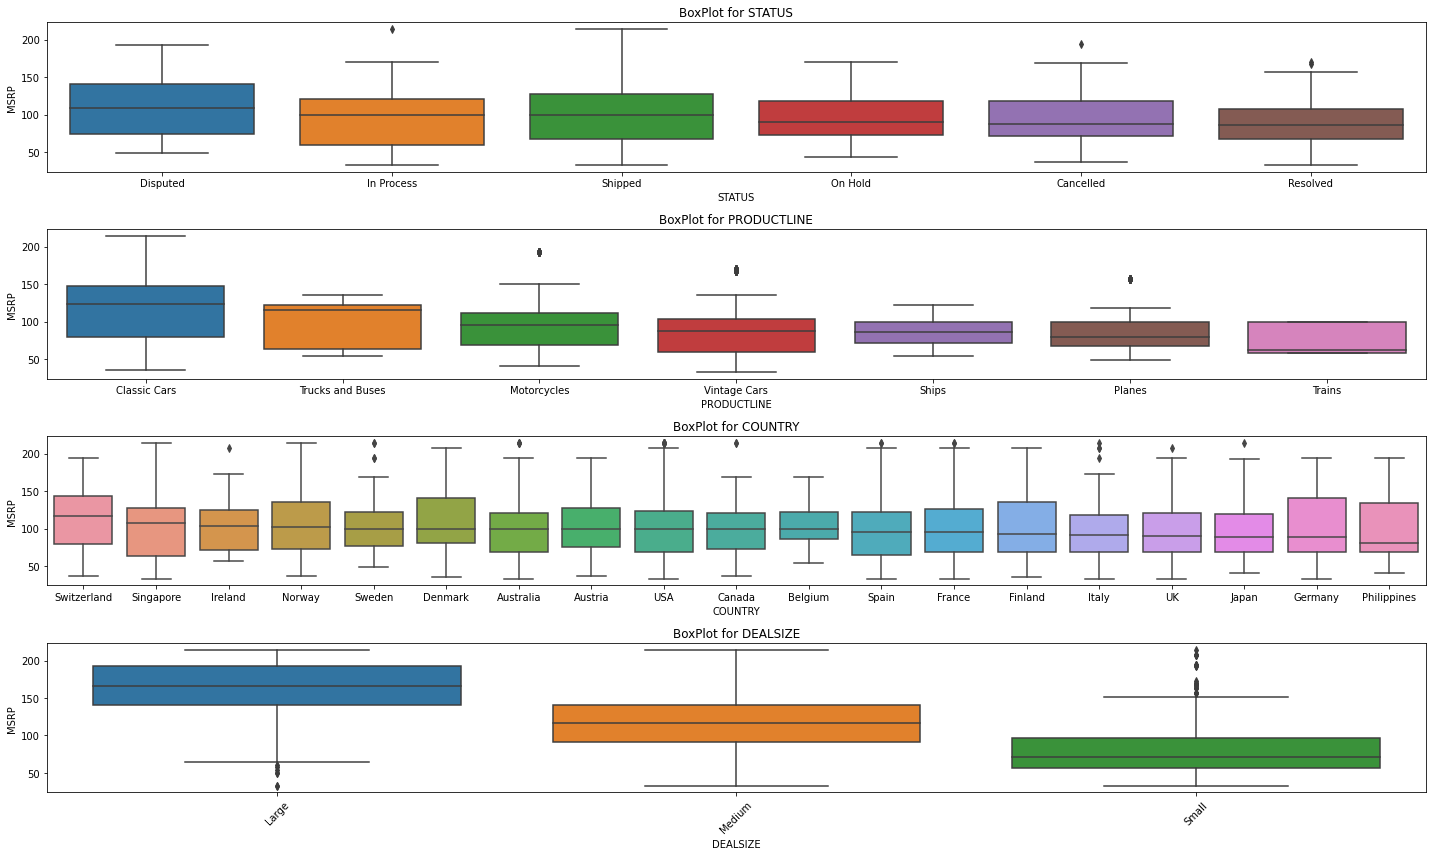

In [98]:
## sns.boxplot(x='economic.cond.household',y='vote', data=election_df)

cols = ('STATUS','PRODUCTLINE','COUNTRY','DEALSIZE')

fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(20,12)
x=0
y=0
for i in cols:
        ax_box=sns.boxplot(x=i,y='MSRP', data=df, ax=axes[x], order = df.groupby(i).median().sort_values(by="MSRP", ascending=False).index)
        plt.xticks(rotation=45)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

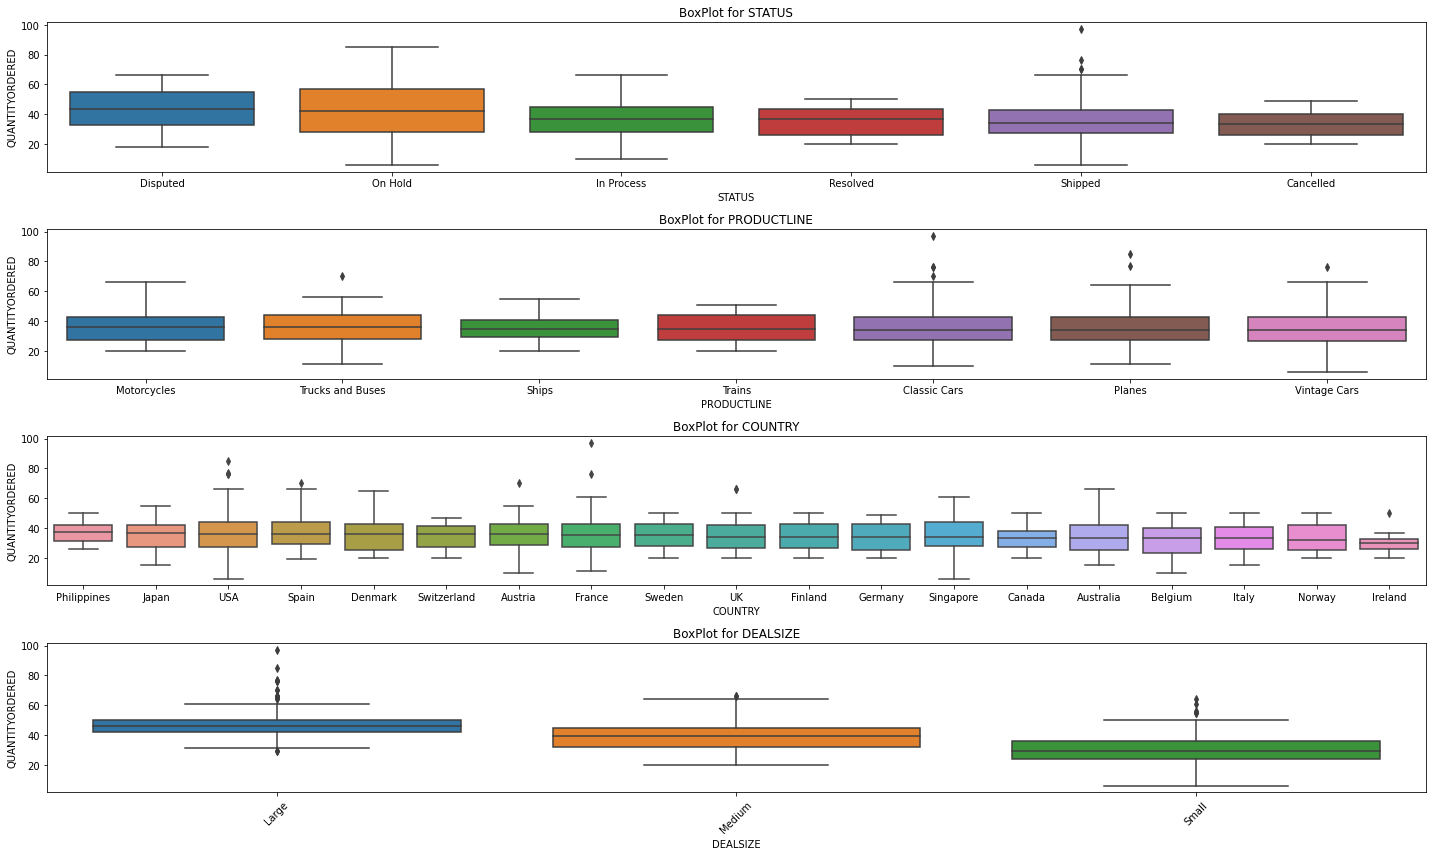

In [100]:
## sns.boxplot(x='economic.cond.household',y='vote', data=election_df)

cols = ('STATUS','PRODUCTLINE','COUNTRY','DEALSIZE')

fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(20,12)
x=0
y=0
for i in cols:
        ax_box=sns.boxplot(x=i,y='QUANTITYORDERED', data=df, ax=axes[x], order = df.groupby(i).median().sort_values(by="QUANTITYORDERED", ascending=False).index)
        plt.xticks(rotation=45)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

### Multivariate Analysis

<Figure size 432x432 with 0 Axes>

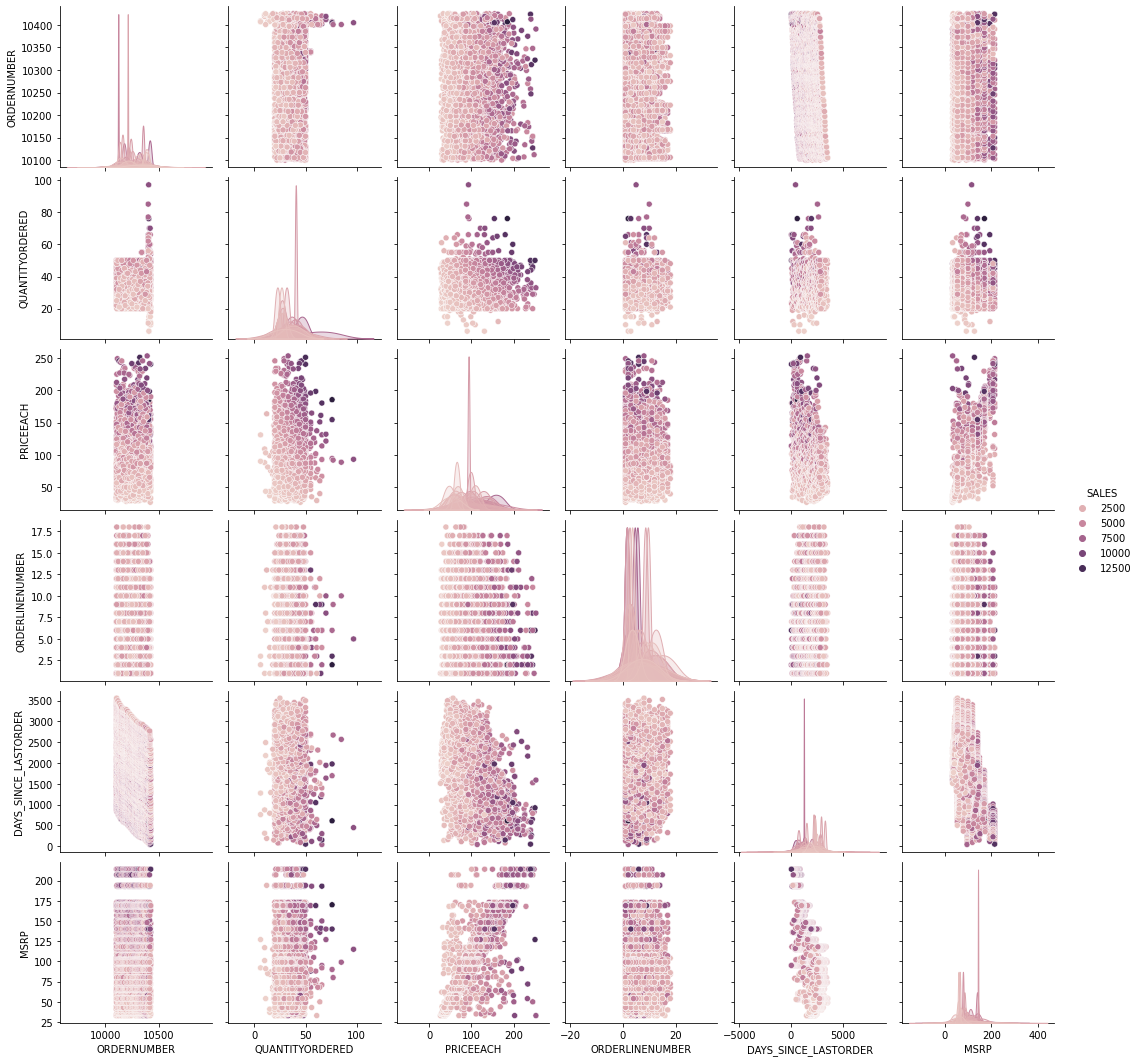

In [201]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df, diag_kind='kde',hue='SALES');

There is no clear separation of the target Column Vote
data is not easily separable by Straight Line, which give us a clear picture, we need to perform further analysis for predicting the classes

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ORDERNUMBER'),
  Text(1.5, 0, 'QUANTITYORDERED'),
  Text(2.5, 0, 'PRICEEACH'),
  Text(3.5, 0, 'ORDERLINENUMBER'),
  Text(4.5, 0, 'SALES'),
  Text(5.5, 0, 'DAYS_SINCE_LASTORDER'),
  Text(6.5, 0, 'MSRP')])

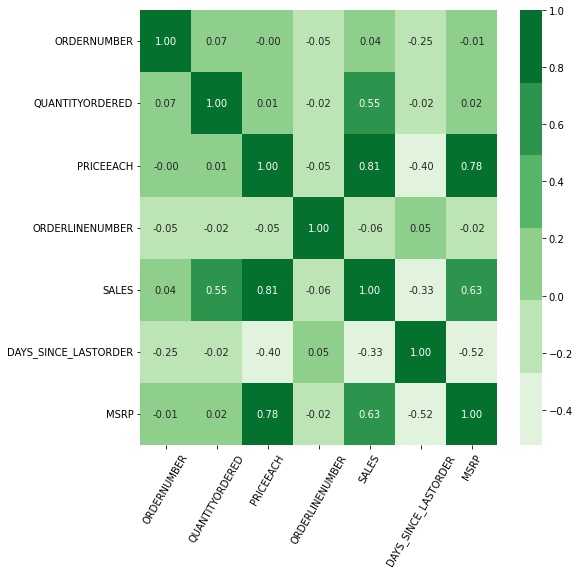

In [33]:
## Heat Map for all Numeric Fields
plt.figure(figsize=(8,8))
colormap = sns.color_palette("Greens")
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap=colormap);
plt.xticks(rotation=60)

In [34]:
df.corr().T

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


##  timeseries analysis on sales data from OrderDate column 

In [130]:
#lets create a separate data frame with Sales and OrderDate columns

df_ts= df[["SALES","ORDERDATE"]].sort_values(by="ORDERDATE")

In [131]:
df_ts.head()

,SALES,ORDERDATE
1959,1689.03,2018-01-06
652,3390.00,2018-01-06
1219,1903.22,2018-01-06
552,5151.00,2018-01-06
797,3773.38,2018-01-09


In [119]:
df_ts

0                                                       2871.0
1                                                       2765.9
2                                                      3884.34
3                                                       3746.7
4                                                      3479.76
                                   ...                        
2743                                                   3978.51
2744                                                   5417.57
2745                                                   2116.16
2746                                                   3079.44
ORDERDATE    1959   2018-01-06
652    2018-01-06
1219   201...
Name: SALES, Length: 2748, dtype: object

In [132]:
df_ts.shape

(2747, 2)

In [123]:
print("Minimum year-month value for Sparkling Wine Sample data :  ",df_ts.index.min())

Minimum year-month value for Sparkling Wine Sample data :   0


In [133]:
df_ts['date'] = pd.to_datetime(df_ts['ORDERDATE'])

In [134]:
df_ts.drop('ORDERDATE',axis=1, inplace=True)

In [135]:
df_ts = df_ts.set_index('date')

In [136]:
df_ts

,SALES
date,
2018-01-06,1689.03
2018-01-06,3390.00
2018-01-06,1903.22
2018-01-06,5151.00
2018-01-09,3773.38
...,...
2020-05-31,2575.10
2020-05-31,5318.04
2020-05-31,3777.58


In [137]:
print("Minimum year-month value for Sales Sample data :  ",df_ts.index.min())

Minimum year-month value for Sales Sample data :   2018-01-06 00:00:00


In [138]:
print("Minimum year-month value for Sales Sample data :  ",df_ts.index.max())

Minimum year-month value for Sales Sample data :   2020-05-31 00:00:00


In [139]:
print("Describer for Sparkling Wine Sample data :  ",df_ts.describe())

Describer for Sparkling Wine Sample data :                 SALES
count   2747.000000
mean    3553.047583
std     1838.953901
min      482.130000
25%     2204.350000
50%     3184.800000
75%     4503.095000
max    14082.800000


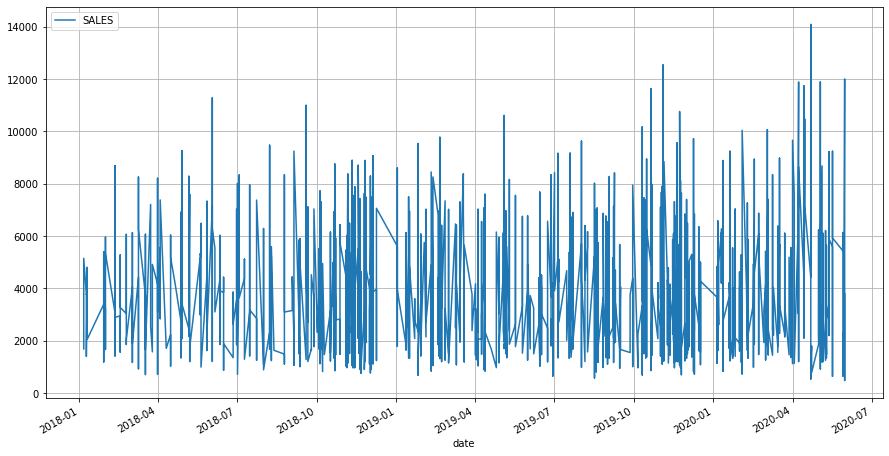

In [140]:
df_ts.plot(figsize=(15,8),grid=True);

Box Plot for Year on year sales data for checking outliers and Comparing Medians

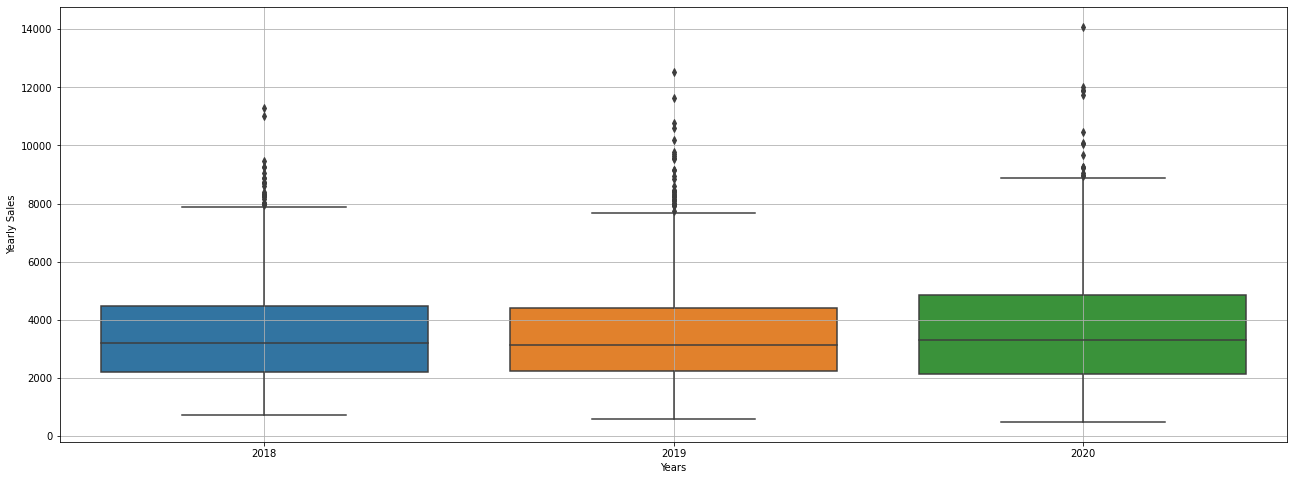

In [142]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_ts.index.year, y=df_ts["SALES"], ax=ax) ##,whis=1.5
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sales');

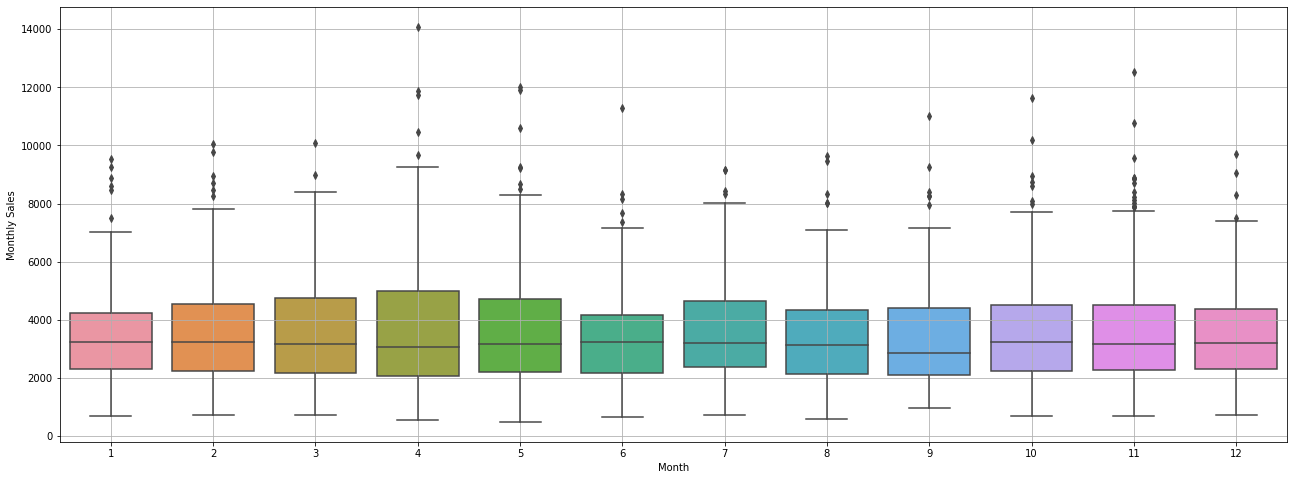

In [144]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_ts.index.month, y=df_ts["SALES"], ax=ax) ##,whis=1.5
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly Sales');

In [145]:
yearly_sales_across_months = pd.pivot_table(df_ts, values = 'SALES', columns = df_ts.index.month, 
                                        index = df_ts.index.year)

yearly_sales_across_months

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2018,3327.015385,3435.029024,3541.120909,3476.026724,3321.950172,3653.968696,3754.6376,3410.505172,3473.333684,3616.556048,3479.181284,3753.088571
2019,3526.362651,3621.157326,3673.816607,3221.064375,3695.113378,3372.637882,3594.9900,3469.934361,3376.325368,3477.511006,3613.308157,3389.115091
2020,3429.731515,3618.840000,3530.780755,4672.023036,3815.508833,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df_yearly_sum = df_ts.resample('A').sum()
df_yearly_sum.head()

,SALES
date,
2018-12-31,3353014.06
2019-12-31,4669924.56
2020-12-31,1737283.09


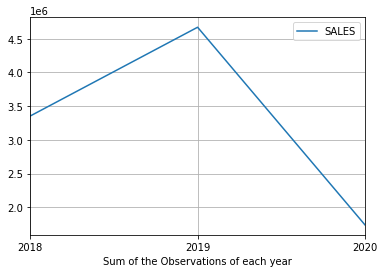

In [147]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [149]:
df_quarterly_sum = df_ts.resample('Q').sum()
df_quarterly_sum.head()

,SALES
date,
2018-03-31,426399.11
2018-06-30,562365.22
2018-09-30,649514.54
2018-12-31,1714735.19
2019-03-31,809841.36


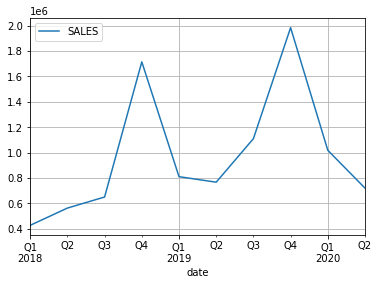

In [150]:
df_quarterly_sum.plot();
plt.grid()

In [ ]:
Monthly Plot

In [152]:
df_monthly_sum = df_ts.resample('M').sum()
df_monthly_sum.head()

,SALES
date,
2018-01-31,129753.60
2018-02-28,140836.19
2018-03-31,155809.32
2018-04-30,201609.55
2018-05-31,192673.11


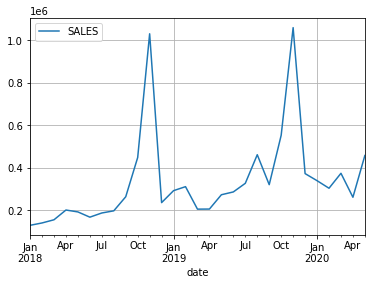

In [153]:
df_monthly_sum.plot();
plt.grid()

In [154]:
df_weekly_sum = df_ts.resample('W').sum()
df_weekly_sum.head()

,SALES
date,
2018-01-07,12133.25
2018-01-14,18296.39
2018-01-21,0.00
2018-01-28,0.00
2018-02-04,99323.96


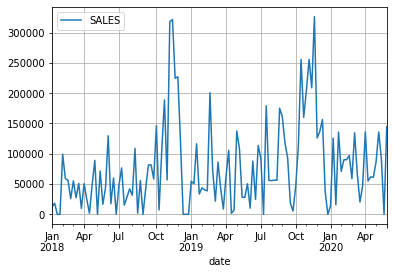

In [155]:
df_weekly_sum.plot();
plt.grid()

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [164]:
## Deal with missing values , if any
from pylab import rcParams
import statsmodels.api as sm

In [165]:
freq=12
extrapolate_trend=12

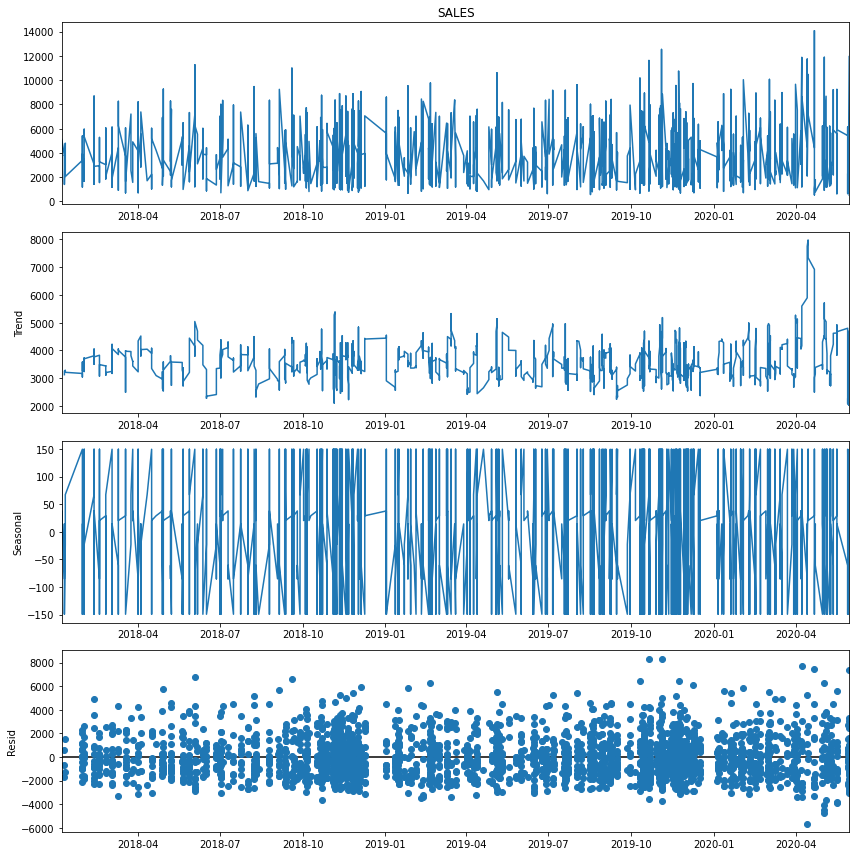

In [180]:
rcParams['figure.figsize'] = 12, 12
decomposition = sm.tsa.seasonal_decompose(df_ts.SALES, model='additive',period=10)
fig = decomposition.plot()
plt.show()

In [181]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [182]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 date
2018-01-06          NaN
2018-01-06          NaN
2018-01-06          NaN
2018-01-06          NaN
2018-01-09          NaN
2018-01-09    3128.2615
2018-01-09    3228.0730
2018-01-09    3259.5705
2018-01-10    3289.2350
2018-01-10    3213.8020
2018-01-29    3172.2075
2018-01-29    3089.1260
Name: trend, dtype: float64 

Seasonality 
 date
2018-01-06    149.598632
2018-01-06     20.383529
2018-01-06     29.060797
2018-01-06     37.801539
2018-01-09    -85.291892
2018-01-09     14.237007
2018-01-09    -60.840726
2018-01-09   -149.458894
2018-01-10    -22.816836
2018-01-10     67.326843
2018-01-29    149.598632
2018-01-29     20.383529
Name: seasonal, dtype: float64 

Residual 
 date
2018-01-06            NaN
2018-01-06            NaN
2018-01-06            NaN
2018-01-06            NaN
2018-01-09            NaN
2018-01-09    -669.538507
2018-01-09     614.767726
2018-01-09   -1706.111606
2018-01-10    1541.891836
2018-01-10   -1225.388843
2018-01-29      73.173868
2018-01-29     

In [183]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

date
2018-01-06            NaN
2018-01-06            NaN
2018-01-06            NaN
2018-01-06            NaN
2018-01-09            NaN
2018-01-09    2458.722993
2018-01-09    3842.840726
2018-01-09    1553.458894
2018-01-10    4831.126836
2018-01-10    1988.413157
2018-01-29    3245.381368
2018-01-29    3659.896471
dtype: float64

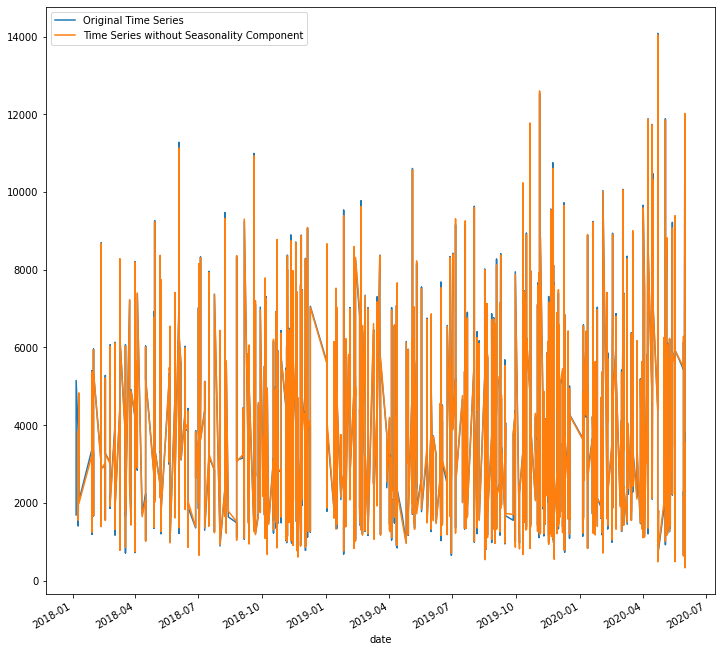

In [185]:
df_ts.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [186]:
df_ts.isnull().sum()

SALES    0
dtype: int64

NameError: name 'matplotlib' is not defined

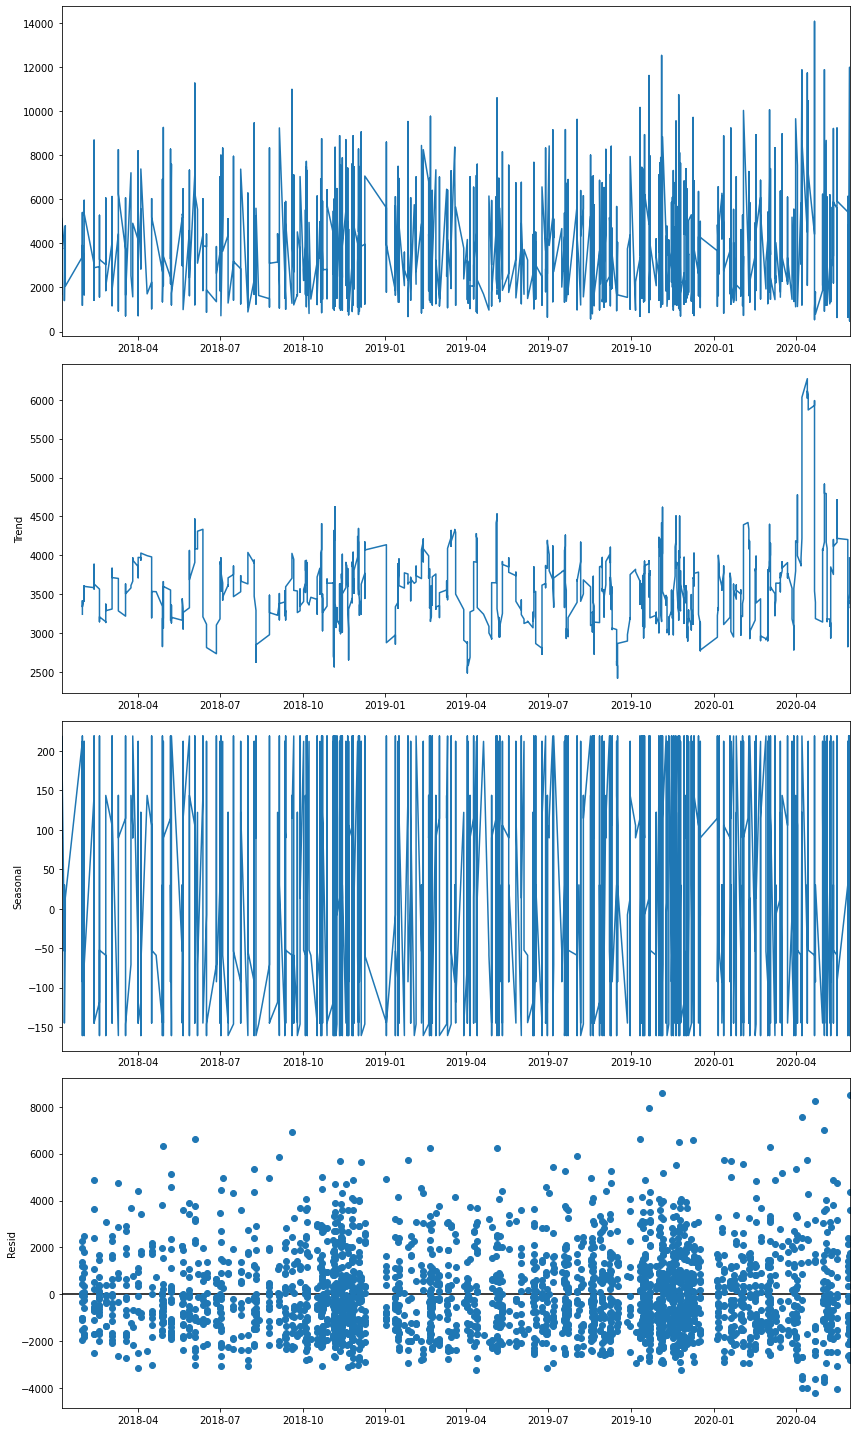

In [179]:
import statsmodels as sm
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_ts, model = 'additive', period=20)
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

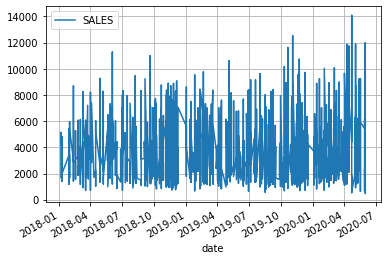

In [148]:
df_ts.plot()
plt.grid()